# Set Up


In [26]:
pip install plotly

In [27]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
#Các thư viện
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
import plotly.graph_objects as go
import re
import string
import warnings
import pickle
warnings.filterwarnings('ignore')
from nltk.stem                        import WordNetLemmatizer
from nltk.corpus                      import stopwords
from nltk.tokenize                    import word_tokenize
from sklearn                          import metrics
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.model_selection          import train_test_split
from sklearn.metrics                  import roc_auc_score
from sklearn.naive_bayes              import MultinomialNB
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.linear_model             import LogisticRegression
from tensorflow                       import keras
from keras.models                     import Sequential
from keras.preprocessing              import sequence
from keras.preprocessing.text         import Tokenizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from gensim.models                    import Word2Vec
from keras.layers                     import Dense, Embedding, LSTM
from keras.preprocessing.sequence     import pad_sequences
from sklearn.metrics                  import mean_squared_error, mean_absolute_error, r2_score
from keras.layers                     import Dropout
from wordcloud                        import WordCloud
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
from google.colab            import drive
drive.mount('/content/drive')
folder = '/content/drive/MyDrive/LTPTDL'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv(folder + '/Womens Clothing E-Commerce Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


- Clothing ID: Mã sản phẩm.
- Age: Tuổi người đánh giá.
- Title: Tiêu đề của đánh giá.
- Review Text: Nội dung của đánh giá.
- Rating: Điểm đánh giá trên thang từ 1 (Tệ nhất) đến 5 (Tốt nhất) do khách hàng đánh giá.
- Recommended IND : Khách hàng có đề xuất sản phẩm này không? 1- có. 0- không
- Positive Feedback Count: Số lượng phản hồi thấy đánh giá này là tích cực.
- Division Name: Tên phân loại chung của sản phẩm.
- Department Name: Tên bộ phận của sản phẩm.
- Class Name Tên lớp: Tên loại của sản phẩm.


# Chương 2. Tổng quan bộ dữ liệu

## I. Phân tích khám phá

In [31]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [33]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## II. Nhận diện các biến

In [34]:
data = data.drop(['Unnamed: 0'], axis=1)

In [35]:
print('Số danh mục của mỗi biến')
print(data.nunique())

Số danh mục của mỗi biến
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64


In [36]:
data["Recommended IND"] = data["Recommended IND"].astype(object)

In [37]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## III. Thống kê dữ liệu

In [38]:
print('Bộ dữ liệu có: ', data.shape[0], 'dòng', data.shape[1], 'cột')
print('Các cột dữ liệu:\n', '\n'.join(data.columns[0:]))

Bộ dữ liệu có:  23486 dòng 10 cột
Các cột dữ liệu:
 Clothing ID
Age
Title
Review Text
Rating
Recommended IND
Positive Feedback Count
Division Name
Department Name
Class Name


# Chương 3. Tiền xử lý dữ liệu


## I. Làm sạch dữ liệu

### 1.Xử lý dữ liệu bị thiếu

In [39]:
print('Dữ liệu bị thiếu:')
data.isnull().sum().sort_values(ascending=False)

Dữ liệu bị thiếu:


Title                      3810
Review Text                 845
Division Name                14
Department Name              14
Class Name                   14
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
dtype: int64

In [40]:
data = data.dropna(subset=['Division Name', 'Department Name', 'Class Name', 'Title', 'Review Text'])

### 2.Xử lý dữ liệu không nhất quán

In [41]:
# Recommended IND
print('Recommended IND: ',data['Recommended IND'].unique()) # 0 với 1

Recommended IND:  [0 1]


## II. Phân tích các biến

In [42]:
recommended = (
    data['Recommended IND']
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index':'Recommended', 'Recommended IND':'Count'})
    .sort_values(by=['Recommended'], ascending=True)
    .replace([0, 1], ['Không', 'Có'])
          )

colors = ['#545684','#C995BD']

fig = go.Figure(data=[go.Pie(labels=recommended['Recommended'],
                             values=recommended['Count'])])

fig.update_traces(hoverinfo='percent',
                  textinfo='label',
                  textfont_size=20,
                  marker=dict(colors=colors,
                              line=dict(color='white', width=1)))

fig.update_layout(showlegend=False,
                  title_text="Biểu đồ thể hiện phân phối của <b>Recommended IND<b>",
                  title_x=0.5,
                  font=dict(family="Rockwell, sans-serif", size=25, color='#000000'))

fig.show()

In [43]:
classes = (
    data
    .groupby(['Recommended IND', 'Class Name'])
    .size()
    .to_frame()
    .rename(columns={0:'Count'})
    .reset_index()
          )
a = classes.groupby('Class Name')['Count'].transform('sum')
classes['Count'] = classes['Count'].div(a)
classes = classes.pivot(index='Class Name', columns='Recommended IND')
fig = go.Figure()
fig.add_trace(go.Bar(
    y=classes.index,
    x=classes.iloc[:,0],
    name='Not Recommended',
    orientation='h',
    marker=dict(
        color='#545684')
    ))
fig.add_trace(go.Bar(
    y=classes.index,
    x=classes.iloc[:,1],
    name='Recommended',
    orientation='h',
    marker=dict(
        color='#C995BD')
    ))
fig.update_layout(barmode='stack')

fig.update_layout(
                title = 'Biểu đồ phân phối <b>Class Name<b> theo <b>Recommended<b> ',
                barmode='stack',
                autosize=False,
                width=680,
                height=800,
                font=dict(family="Rockwell, sans-serif", size=18, color='#000000'),
                margin=dict(
                  l=150,
                  r=100,
                   b=30,
                   t=100,
                   pad=4
                          ))
fig.layout.xaxis.tickformat = ',.0%'
fig.show()

In [44]:
count_words = data["Review Text"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [45]:
count_words = pd.Series(" ".join(count_words).split()).value_counts()
print(count_words)

this                      18556
with                      11345
that                       8247
have                       7124
dress                      6941
                          ...  
(located                      1
sites!)                       1
didn&amp;#39;t                1
5&amp;#39;6&amp;quot;,        1
platinum                      1
Length: 34217, dtype: int64


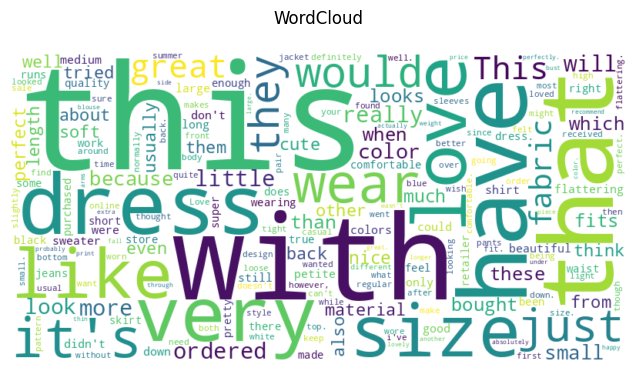

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=count_words)

fig, ax = plt.subplots(figsize=(14, 4))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("WordCloud\n")

plt.show()

# Chương 4. Mô hình dự đoán

In [47]:
df=data[['Review Text','Recommended IND']]

In [48]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    text = ' '.join(tokens)
    return text

In [49]:
df['Review Text'] = df['Review Text'].apply(lambda x:clean_text(x))

In [50]:
df.info()
df.to_csv(folder+"/data_NLP.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      19662 non-null  object
 1   Recommended IND  19662 non-null  object
dtypes: object(2)
memory usage: 460.8+ KB


In [51]:
def roc_auc(predictions,target):

    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [52]:
X = df['Review Text']
y = df['Recommended IND']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X.tolist())

word_index = tokenizer.word_index

X_seq = tokenizer.texts_to_sequences(X.tolist())

X_pad = pad_sequences(X_seq)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)
y_train = np.array(y_train, dtype=np.int32)
y_test  = np.array(y_test, dtype=np.int32)

In [54]:
word2vec_model = Word2Vec(sentences=X_pad.tolist(), vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.init_sims(replace=True)
embedding_matrix = word2vec_model.wv.vectors
vocab_size, embedding_dim = embedding_matrix.shape

## I. Xây dựng mô hình dự đoán

### 1.Naive Bayes

In [55]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [56]:
predicted=NB.predict(X_test)

In [57]:
predicted=NB.predict(X_test)
y_pred = NB.predict(X_test)
print("AUC: %.2f%%" % (roc_auc(y_pred,y_test)))

AUC: 0.52%


### 2.Decision Tree

In [58]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [59]:
y_pred = DT.predict(X_test)
print("AUC: %.2f%%" % (roc_auc(y_pred,y_test)))

AUC: 0.52%


### 3.Logistic Regression

In [60]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [61]:
y_pred = logistic_regression.predict(X_test)
print("AUC: %.2f%%" % (roc_auc(y_pred,y_test)))

AUC: 0.50%


### 4.LSTM

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=X_train.shape[1], trainable=False))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
492/492 [==============================] - 25s 46ms/step - loss: 0.4119 - accuracy: 0.8241 - val_loss: 0.3670 - val_accuracy: 0.8327
Epoch 2/10
492/492 [==============================] - 23s 47ms/step - loss: 0.3512 - accuracy: 0.8442 - val_loss: 0.3438 - val_accuracy: 0.8474
Epoch 3/10
492/492 [==============================] - 23s 46ms/step - loss: 0.3324 - accuracy: 0.8557 - val_loss: 0.3347 - val_accuracy: 0.8515
Epoch 4/10
492/492 [==============================] - 24s 49ms/step - loss: 0.3181 - accuracy: 0.8596 - val_loss: 0.3312 - val_accuracy: 0.8502
Epoch 5/10
492/492 [==============================] - 23s 46ms/step - loss: 0.3090 - accuracy: 0.8648 - val_loss: 0.3307 - val_accuracy: 0.8525
Epoch 6/10
492/492 [==============================] - 23s 46ms/step - loss: 0.2923 - accuracy: 0.8717 - val_loss: 0.3131 - val_accuracy: 0.8683
Epoch 7/10
492/492 [==============================] - 23s 46ms/step - loss: 0.2842 - accuracy: 0.8772 - val_loss: 0.3115 - val_accuracy:

In [63]:
model.fit(X_train, y_train)
print("Training Completed")

492/492 [==============================] - 21s 43ms/step - loss: 0.2471 - accuracy: 0.8933
Training Completed


In [64]:
y_pred = model.predict(X_test)
print("AUC: %.3f%%" % (roc_auc(y_pred,y_test)))

123/123 [==============================] - 2s 15ms/step
AUC: 0.913%


## II. Đánh giá mô hình

In [65]:
# Đánh giá mô hình Naive Bayes
naive_bayes_predictions = NB.predict(X_test)
naive_bayes_mse = mean_squared_error(y_test, naive_bayes_predictions)
naive_bayes_mae = mean_absolute_error(y_test, naive_bayes_predictions)
naive_bayes_r2 = r2_score(y_test, naive_bayes_predictions)
naive_bayes_percentage_error = np.mean(np.abs((y_test - naive_bayes_predictions) / y_test)) * 100

print("Naive Bayes:")
print("MSE:", naive_bayes_mse)
print("MAE:", naive_bayes_mae)
print("R-square:", naive_bayes_r2)

# Đánh giá mô hình Logistic Regression
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_mse = mean_squared_error(y_test, logistic_regression_predictions)
logistic_regression_mae = mean_absolute_error(y_test, logistic_regression_predictions)
logistic_regression_r2 = r2_score(y_test, logistic_regression_predictions)
logistic_regression_percentage_error = np.mean(np.abs((y_test - logistic_regression_predictions) / y_test)) * 100

print("\nLogistic Regression:")
print("MSE:", logistic_regression_mse)
print("MAE:", logistic_regression_mae)
print("R-square:", logistic_regression_r2)

# Đánh giá mô hình Decision Tree
decision_tree_predictions = DT.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_percentage_error = np.mean(np.abs((y_test - decision_tree_predictions) / y_test)) * 100

print("\nDecision Tree:")
print("MSE:", decision_tree_mse)
print("MAE:", decision_tree_mae)
print("R-square:", decision_tree_r2)

# Đánh giá mô hình LSTM
lstm_predictions = model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_percentage_error = np.mean(np.abs((y_test - lstm_predictions) / y_test)) * 100

print("\nLSTM:")
print("MSE:", lstm_mse)
print("MAE:", lstm_mae)
print("R-square:", lstm_r2)

Naive Bayes:
MSE: 0.547165013984236
MAE: 0.547165013984236
R-square: -2.6785285565894634

Logistic Regression:
MSE: 0.18281210272056955
MAE: 0.18281210272056955
R-square: -0.22902510789397046

Decision Tree:
MSE: 0.2957030256801424
MAE: 0.2957030256801424
R-square: -0.9879780257033206
123/123 [==============================] - 2s 15ms/step

LSTM:
MSE: 0.08811651278422267
MAE: 0.16404286198407514
R-square: 0.40760264216530817
